# Dog vs Cat Convolution Neural Network Classifier

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 25,000 and final testing is done on seperate 10,000 images.


### Dependencies
* Jupyter notebook
* Tensorflow 1.10
* Python 3.6
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy


#### Test Train Split
Image training set contain 12500 images for each category. I split those into 80% train and 20% means test Split each class images into 10,000 for train and 2,500 for test. 



In [2]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Network Parameter:
* Rectifier Linear Unit 
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # stride not given defaults to pool filter size
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


## Data Augmentation
Using some Data Augmentation techniques for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [5]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
source_dir = "dataset"  # Ensure this directory exists and contains 'Cat' and 'Dog' subfolders
train_dir = "train"
test_dir = "test"

# Ensure target directories exist
for dir_path in [train_dir, test_dir]:
    for class_name in ["Cat", "Dog"]:
        os.makedirs(os.path.join(dir_path, class_name), exist_ok=True)

# Function to split and move files
def split_and_move_files(class_name, source_dir, train_dir, test_dir, test_size=0.2):
    class_path = os.path.join(source_dir, class_name)
    all_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.jpg')]

    # Debugging: Check number of files
    print(f"Processing class: {class_name}")
    print(f"Number of files in {class_path}: {len(all_files)}")

    if not all_files:  # Handle empty folders
        print(f"No files found for class: {class_name}")
        return

    # Split into train and test
    train_files, test_files = train_test_split(all_files, test_size=test_size, random_state=42)

    # Move files to respective directories
    for file in train_files:
        shutil.move(file, os.path.join(train_dir, class_name))
    for file in test_files:
        shutil.move(file, os.path.join(test_dir, class_name))

# Split and move for both classes (80% training, 20% testing)
split_and_move_files("Cat", source_dir, train_dir, test_dir, test_size=0.2)
split_and_move_files("Dog", source_dir, train_dir, test_dir, test_size=0.2)

print("Dataset successfully split into train and test folders!")

# Debugging: Check the number of images in each folder
print(f"Train Cat files: {len(os.listdir(os.path.join(train_dir, 'Cat')))}")
print(f"Train Dog files: {len(os.listdir(os.path.join(train_dir, 'Dog')))}")
print(f"Test Cat files: {len(os.listdir(os.path.join(test_dir, 'Cat')))}")
print(f"Test Dog files: {len(os.listdir(os.path.join(test_dir, 'Dog')))}")


Processing class: Cat
Number of files in dataset\Cat: 0
No files found for class: Cat
Processing class: Dog
Number of files in dataset\Dog: 0
No files found for class: Dog
Dataset successfully split into train and test folders!
Train Cat files: 9999
Train Dog files: 9999
Test Cat files: 2500
Test Dog files: 2501


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)

#TRAIN CAT666,DOG11702 remove these as they are wrong image format


Found 19998 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
source_dir = "dataset"  # Ensure this directory contains 'Cat' and 'Dog' subfolders
train_dir = os.path.join(source_dir, "train")
test_dir = os.path.join(source_dir, "test")

# Ensure target directories exist
for dir_path in [train_dir, test_dir]:
    for class_name in ["Cat", "Dog"]:
        os.makedirs(os.path.join(dir_path, class_name), exist_ok=True)

# Function to split and move files
def split_and_move_files(class_name, source_dir, train_dir, test_dir, test_size=0.2):
    class_path = os.path.join(source_dir, class_name)
    all_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.jpg')]

    # Debugging: Check number of files
    print(f"Processing class: {class_name}")
    print(f"Number of files in {class_path}: {len(all_files)}")

    if not all_files:  # Handle empty folders
        print(f"No files found for class: {class_name}")
        return

    # Split into train and test
    train_files, test_files = train_test_split(all_files, test_size=test_size, random_state=42)

    # Move files to respective directories
    for file in train_files:
        shutil.move(file, os.path.join(train_dir, class_name, os.path.basename(file)))
    for file in test_files:
        shutil.move(file, os.path.join(test_dir, class_name, os.path.basename(file)))

# Split and move for both classes (80% training, 20% testing)
split_and_move_files("Cat", source_dir, train_dir, test_dir, test_size=0.2)
split_and_move_files("Dog", source_dir, train_dir, test_dir, test_size=0.2)

print("Dataset successfully split into train and test folders!")

# Debugging: Check the number of images in each folder
print(f"Train Cat files: {len(os.listdir(os.path.join(train_dir, 'Cat')))}")
print(f"Train Dog files: {len(os.listdir(os.path.join(train_dir, 'Dog')))}")
print(f"Test Cat files: {len(os.listdir(os.path.join(test_dir, 'Cat')))}")
print(f"Test Dog files: {len(os.listdir(os.path.join(test_dir, 'Dog')))}")


Processing class: Cat
Number of files in dataset\Cat: 0
No files found for class: Cat
Processing class: Dog
Number of files in dataset\Dog: 0
No files found for class: Dog
Dataset successfully split into train and test folders!
Train Cat files: 9999
Train Dog files: 9999
Test Cat files: 2500
Test Dog files: 2500


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training Set
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')

# Validation Set
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)

# If you have a test1 set, define it similarly
test_set1 = test_datagen.flow_from_directory('test1',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)


Found 19998 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


Found 19998 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
✅ Model loaded successfully from disk!
✅ Training history loaded successfully!


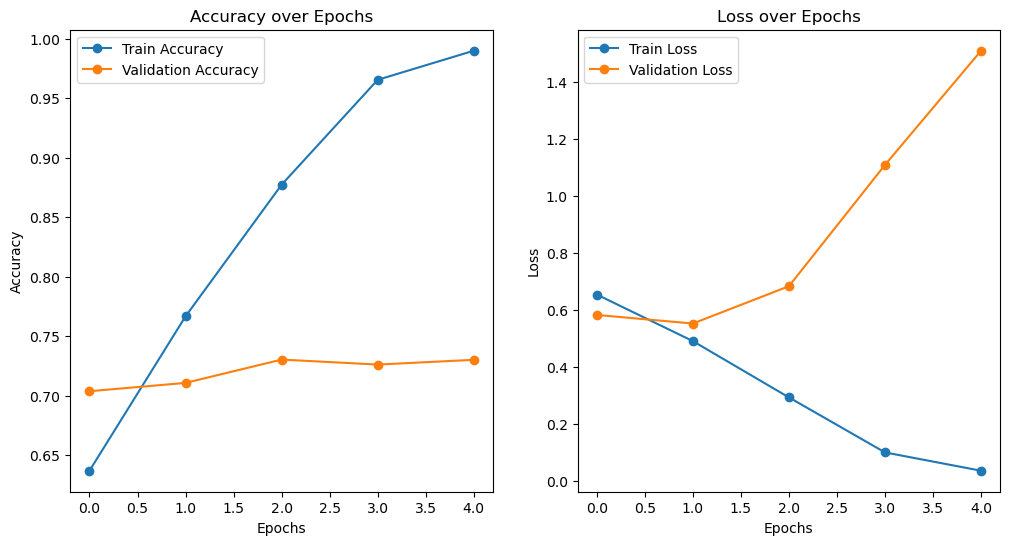

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# ✅ **Step 1: Set Dataset Paths**
train_dir = 'C:/Users/pavan/OneDrive/PROJECTS/Cat-Dog-CNN-Classifier-master/dataset/train'
test_dir = 'C:/Users/pavan/OneDrive/PROJECTS/Cat-Dog-CNN-Classifier-master/dataset/test'

# ✅ **Step 2: Image Data Preprocessing**
image_size = (224, 224)  # 🔥 Use 224x224 for better accuracy
batch_size = 8

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  
    batch_size=batch_size,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,  
    batch_size=batch_size,
    class_mode='binary'
)

# ✅ **Step 3: Check if Model Exists**
model_path = 'cat_dog_classifier.keras'  # Use .keras format
history_path = 'training_history.pkl'

if os.path.exists(model_path):
    # ✅ Model exists, load it
    model = tf.keras.models.load_model(model_path)
    print("✅ Model loaded successfully from disk!")

    # Load history if it exists
    if os.path.exists(history_path):
        with open(history_path, 'rb') as f:
            history_data = pickle.load(f)
        print("✅ Training history loaded successfully!")
else:
    # ✅ Model doesn't exist, train a new one
    print("🔄 Training a new model...")

    # Define the CNN model
    model = Sequential()

    # Convolution + Pooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening
    model.add(Flatten())

    # Fully Connected Layers
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

    # ✅ Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # ✅ EarlyStopping to avoid overfitting and save best weights
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    # ✅ ModelCheckpoint to save the best model
    model_checkpoint = ModelCheckpoint(model_path, save_best_only=True)

    # ✅ Train the Model
    history = model.fit(
        train_set,
        steps_per_epoch=len(train_set),
        epochs=5,  # Reduced epochs for faster training
        validation_data=test_set,
        validation_steps=len(test_set),
        callbacks=[early_stopping, model_checkpoint]  # Use both callbacks
    )

    # ✅ Save the trained model manually after training
    model.save(model_path)  # Save the model as .keras
    print(f"✅ Model saved successfully as {model_path}")

    # ✅ Save history
    with open(history_path, 'wb') as f:
        pickle.dump(history.history, f)
    print(f"✅ Training history saved as {history_path}")

    history_data = history.history

# ✅ **Step 4: Plot Training History**
if 'history_data' in locals():
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history_data['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history_data['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history_data['loss'], label='Train Loss', marker='o')
    plt.plot(history_data['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



### Prediction of Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


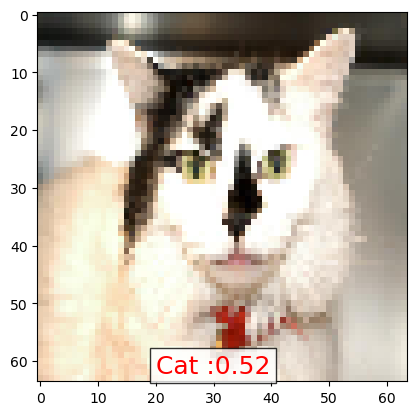

In [11]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('test/Cat/208.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Dog :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()


In [12]:
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # Change back to 64x64
    batch_size=8,  
    class_mode='binary'
)


Found 5000 images belonging to 2 classes.


In [14]:
import pandas as pd  # Import pandas to use DataFrame
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Ensure the image size used during prediction is the same as the training size
image_size = (224, 224)  # Should match the input size used during training

# Step 2: Update test_data generator to use the same size
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,  # Ensure target size is 224x224
    batch_size=batch_size,
    class_mode='binary'
)

# Step 3: Reset the generator for correct prediction
test_set.reset()

# Step 4: Perform the prediction
ytesthat = model.predict(test_set, steps=len(test_set))

# Step 5: Prepare the DataFrame
df = pd.DataFrame({
    'filename': test_set.filenames,
    'predict': ytesthat[:, 0],  # Get the prediction value for binary classification
    'y': test_set.classes  # Actual class labels
})

print(df.head())  # Check the first few predictions


Found 5000 images belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step
        filename   predict  y
0      Cat\0.jpg  0.391976  0
1    Cat\100.jpg  0.010506  0
2  Cat\10003.jpg  0.346217  0
3  Cat\10009.jpg  0.773536  0
4  Cat\10011.jpg  0.710479  0


In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Cat\0.jpg,0.39198,0,0
1,Cat\100.jpg,0.01051,0,0
2,Cat\10003.jpg,0.34622,0,0
3,Cat\10009.jpg,0.77354,0,1
4,Cat\10011.jpg,0.71048,0,1
5,Cat\10013.jpg,0.88518,0,1
6,Cat\10024.jpg,0.27595,0,0
7,Cat\10026.jpg,0.57444,0,1
8,Cat\10028.jpg,0.29284,0,0
9,Cat\10031.jpg,0.83173,0,1


In [16]:
df['predict'].head()  # Might show values like 0.87, 0.12, 0.56, etc.


0   0.39198
1   0.01051
2   0.34622
3   0.77354
4   0.71048
Name: predict, dtype: float32

In [17]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 2480


Confusion Matrix Shape: (2, 2)
Confusion Matrix:
 [[ 893 1607]
 [ 873 1627]]


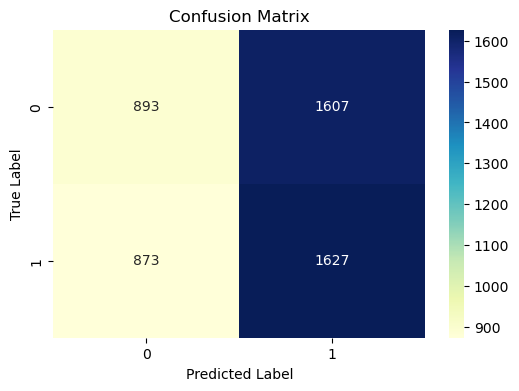

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert probabilities to binary classification
df['y_pred'] = (df['predict'] > 0.5).astype(int)

# Ensure both y and y_pred are integers
df['y'] = df['y'].astype(int)
df['y_pred'] = df['y_pred'].astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(df.y, df.y_pred)

# Debugging: Check the shape
print("Confusion Matrix Shape:", conf_matrix.shape)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


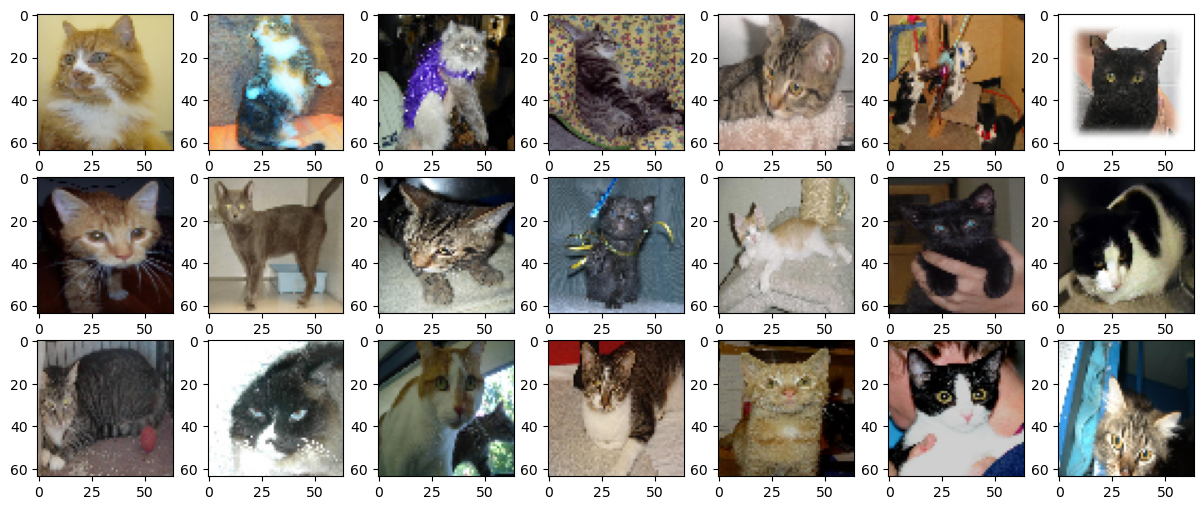

In [19]:
#Some of Cat image misclassified as Dog.
import matplotlib.image as mpimg

CatasDog = df['filename'][(df.y==0)&(df.y_pred==1)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/'+CatasDog.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)

plt.show()


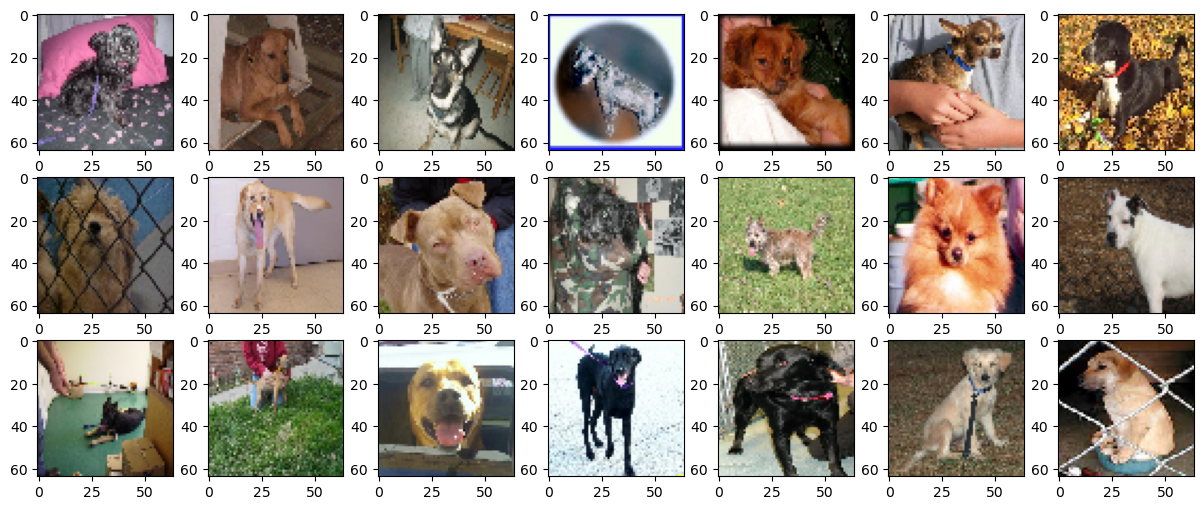

In [20]:
#Some of Dog image misclassified as Cat.
import matplotlib.image as mpimg

DogasCat = df['filename'][(df.y==1)&(df.y_pred==0)]
fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(columns*rows):
    #img = mpimg.imread()
    img = image.load_img('test/'+DogasCat.iloc[i], target_size=(64, 64))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show()


In [21]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

### Visualization of Layers Ouptut


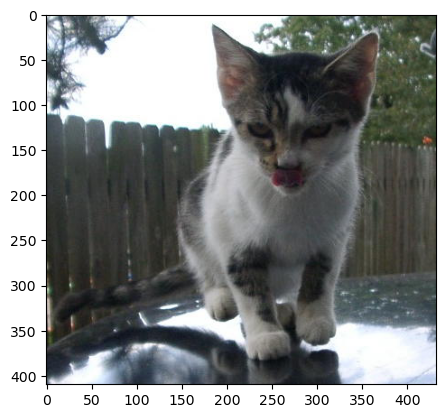

In [22]:
#Input Image for Layer visualization
img1 = image.load_img('test/Cat/11.jpg')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('test/Cat/11.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)


In [23]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [24]:

import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16  # You can use your specific model here

# Load your pre-trained model (replace with your own model if needed)
classifier = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build the model by passing a dummy input through it to initialize the layers
dummy_input = np.random.random((1, 224, 224, 3))  # Match the model's expected input size

# Pass the dummy input through the model to build the model layers
classifier(dummy_input)

# Extract the output of specific layers (conv2d_6 and conv2d_7 in this case)
conv2d_6_output = Model(inputs=classifier.input, outputs=classifier.get_layer('block3_conv1').output)  # Modify layer name as per your model
conv2d_7_output = Model(inputs=classifier.input, outputs=classifier.get_layer('block3_conv2').output)  # Modify layer name as per your model

# Get the feature maps of these layers by making predictions with the dummy input
conv2d_6_features = conv2d_6_output.predict(dummy_input)
conv2d_7_features = conv2d_7_output.predict(dummy_input)

# Print the shapes of the outputs of the convolutional layers
print(f"Conv2d_6 output shape: {conv2d_6_features.shape}")
print(f"Conv2d_7 output shape: {conv2d_7_features.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Conv2d_6 output shape: (1, 56, 56, 256)
Conv2d_7 output shape: (1, 56, 56, 256)


In [25]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras')
conv2d_6_features = conv2d_6_output.predict(img)
conv2d_7_features = conv2d_7_output.predict(img)
print('First conv layer feature output shape : ',conv2d_6_features.shape)
print('First conv layer feature output shape : ',conv2d_7_features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
First conv layer feature output shape :  (1, 16, 16, 256)
First conv layer feature output shape :  (1, 16, 16, 256)


### Single Convolution Filter Output

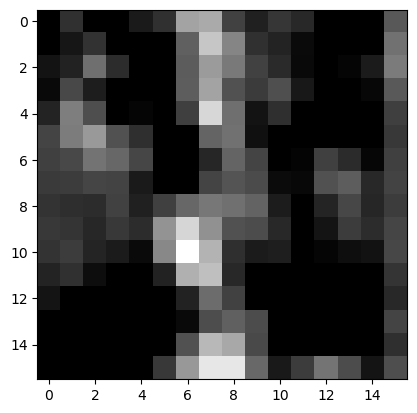

In [26]:
plt.imshow(conv2d_6_features[0, :, :, 4], cmap='gray')

### First Covolution Layer Output

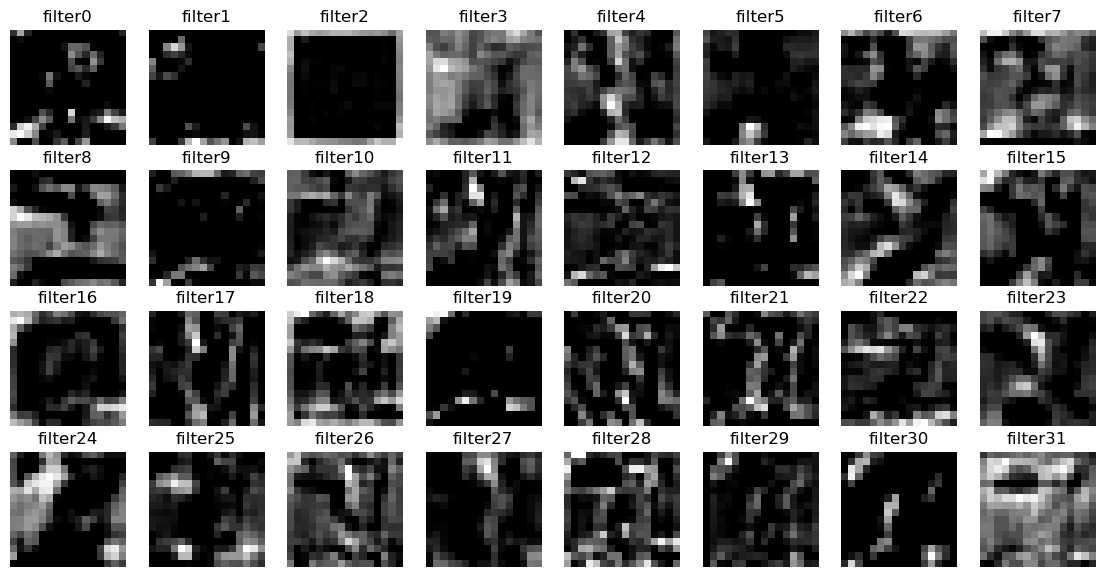

In [27]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_6_features[0, :, :, i], cmap='gray')
plt.show()

### Second Covolution Layer Output

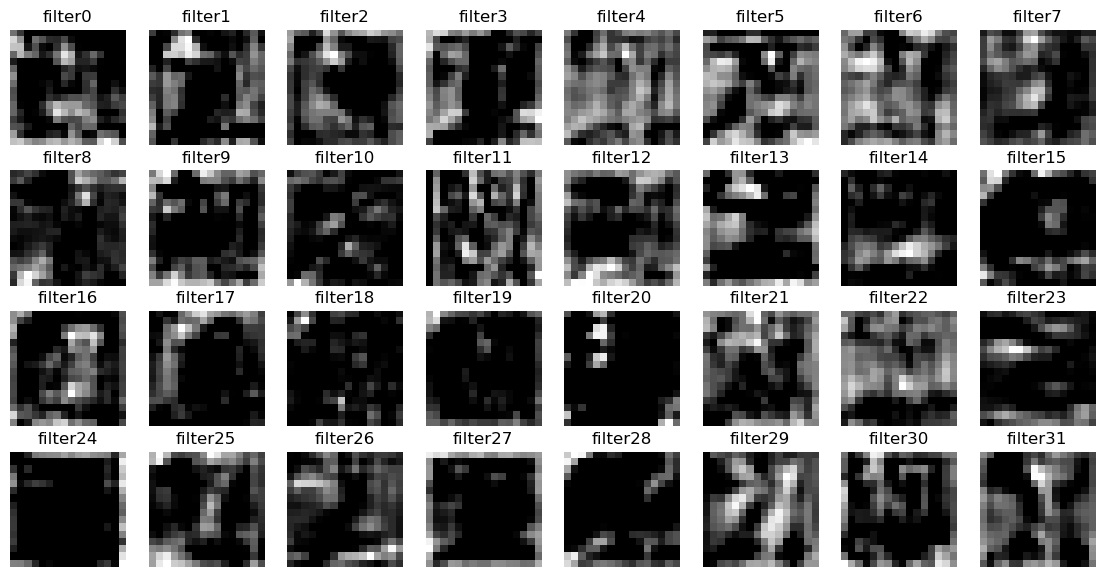

In [28]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_7_features[0, :, :, i], cmap='gray')
plt.show()

### Model Performance on Unseen Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


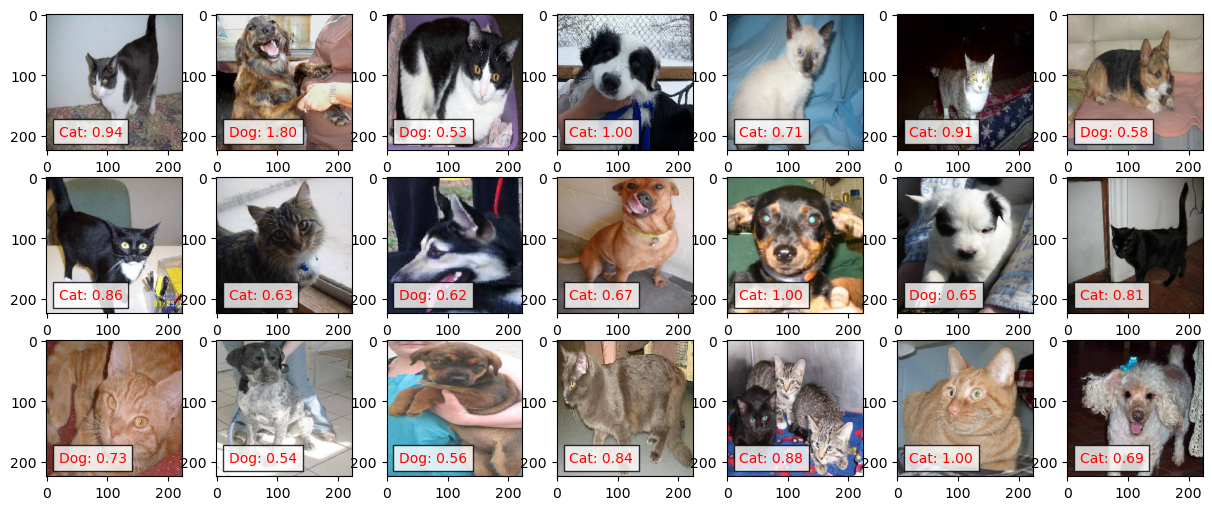

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

fig = plt.figure(figsize=(15, 6))
columns, rows = 7, 3

for i in range(columns * rows):
    fig.add_subplot(rows, columns, i + 1)

    # Select a random test image
    img_path = 'test1/' + test_set1.filenames[np.random.randint(len(test_set1.filenames))]
    img1 = image.load_img(img_path, target_size=(224, 224))  # Ensure correct size

    # Preprocess image
    img = image.img_to_array(img1) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dims for model input

    # Get prediction
    prediction = classifier.predict(img)

    # Extract prediction value
    prediction_value = float(prediction.flatten()[0])

    # Determine class
    if prediction_value > 0.5:
        value = f'Dog: {prediction_value:.2f}'
    else:
        value = f'Cat: {1.0 - prediction_value:.2f}'

    # Display image with label
    plt.text(20, 200, value, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    plt.imshow(img1)

plt.show()


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten or GlobalAveragePooling2D to match target shape
    Flatten(),  # OR use GlobalAveragePooling2D()

    # Fully connected layers
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [44]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate Model
x1 = model.evaluate(train_set)
x2 = model.evaluate(test_set)

# Print Training & Validation Results
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f' % (x1[1]*100, x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f' % (x2[1]*100, x2[0]))


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 445s 178ms/step - accuracy: 0.4989 - loss: 0.6957
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 97ms/step - accuracy: 0.4937 - loss: 0.6959
Training Accuracy  : 49.93%     Training loss  : 0.695797
Validation Accuracy: 49.96%     Validation loss: 0.695680


### Conclusion
The Architecture and parameter used in this network are capable of producing good accuracy on Validation Data. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training.